In [1]:
import geopandas as gpd
from shapely.geometry import Point  
import matplotlib.pyplot as plt 

vm_map = gpd.read_file('./Census tract - Percentage of visible minority/Census tract - Percentage of visible minority, n.i.e..shp')

vm_map.rename(columns={'Value': 'Percentage of visible minority'}, inplace=True)

In [2]:
from shapely.geometry import box
import geodatasets
import mapclassify

toronto = gpd.read_file('./toronto_neighbourhoods/neighbourhood.shp')
toronto_proj = toronto.to_crs(epsg=2958)
vm_map_proj = vm_map.to_crs(epsg=2958)

#toronto_proj.to_file('toronto_ct', driver=None, schema=None, index=None)

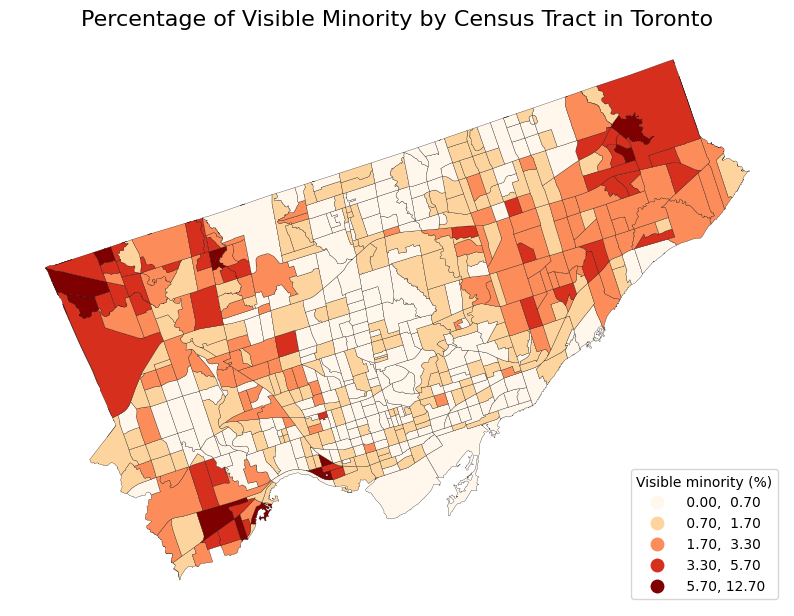

In [3]:
to_ct = gpd.clip(vm_map_proj, toronto_proj)

fig, ax = plt.subplots(figsize=(10, 10))

map = to_ct.plot(column='Percentage of visible minority', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Visible minority (%)'}, 
            ax=ax, edgecolor='black', linewidth=0.2)
map.set_title("Percentage of Visible Minority by Census Tract in Toronto", fontsize=16)
map.set_axis_off()

In [4]:
mmhh_map = gpd.read_file('./Census tract - Median total income of households in 2020 ($)/Census tract - Median total income of households in 2020 ($).shp')
mmhh_map.rename(columns={'Value': 'Median total income of households in 2020 ($)'}, inplace=True)

In [5]:
hor_map = gpd.read_file('./Census tract - Homeownership rate (%)/Census tract - Homeownership rate (%).shp')
hor_map.rename(columns={'Value': 'Homeownership rate (%)'}, inplace=True)

In [6]:
mmhh_to = gpd.clip(mmhh_map.to_crs(epsg=2958), toronto_proj)
hor_to = gpd.clip(hor_map.to_crs(epsg=2958), toronto_proj)

# also read in the isochrones here too
isos = gpd.read_file('./isochrones_final/isochrones_change_final.shp')
isos_df = isos[['DGUID', '30_change', '15_change', '30_2015', '30_2025', '15_2015', '15_2025', '15_increas', '30_increas']].rename(
    columns = {'15_increas': '15_increase', '30_increas': '30_increase'})

In [7]:
# I cleaned this up a bit - interpolate the data right away so the maps are all consistent
# also a cleaner merger than you had below, removes some redundant columns and is clearer what you need and what you do not
to_ct_cleaned = to_ct[['DGUID', 'geometry']].merge(to_ct[['Percentage of visible minority', 'DGUID']].interpolate(),
                                                    how = 'left', on = 'DGUID')

# merge all the variables, including isochrone variables here (isochrones have no NaN values)
to_all = (to_ct_cleaned.merge(mmhh_to[['Median total income of households in 2020 ($)', 'DGUID']].interpolate(),
                       how = 'left', on = 'DGUID')).merge(hor_to[['Homeownership rate (%)', 'DGUID']].interpolate(),
                                                            how = 'left', on = 'DGUID').merge(isos_df, how = 'left', on = 'DGUID')

# vm_mmhh_ct = to_ct.merge(mmhh_to, how = 'left').iloc[:, [0,1,3,2,5,4]]
# vm_hor_ct = to_ct.merge(hor_to, how = 'left').iloc[:, [0,1,3,2,5,4]]
# mmhh_hor_ct = mmhh_to.merge(hor_to, how = 'left').iloc[:, [0,1,3,2,5,4]]

C:\Users\saman\AppData\Local\Temp\ipykernel_35312\2976810687.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  to_ct_cleaned = to_ct[['DGUID', 'geometry']].merge(to_ct[['Percentage of visible minority', 'DGUID']].interpolate(),
C:\Users\saman\AppData\Local\Temp\ipykernel_35312\2976810687.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  to_all = (to_ct_cleaned.merge(mmhh_to[['Median total income of households in 2020 ($)', 'DGUID']].interpolate(),
C:\Users\saman\AppData\Local\Temp\ipykernel_35312\2976810687.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  how = 'left', on = 'DGUID')).merge(hor_to[['Homeowner

Index(['DGUID', 'geometry', 'Percentage of visible minority',
       'Median total income of households in 2020 ($)',
       'Homeownership rate (%)', '30_change', '15_change', '30_2015',
       '30_2025', '15_2015', '15_2025', '15_increase', '30_increase'],
      dtype='object')


(<Figure size 3000x800 with 3 Axes>,
 array([[<Axes: title={'center': 'Percentage of Visible Minorities in 2021'}>,
         <Axes: title={'center': 'Median total income of households in 2020 ($)'}>,
         <Axes: title={'center': 'Homeownership rate (%) in 2021'}>]],
       dtype=object))

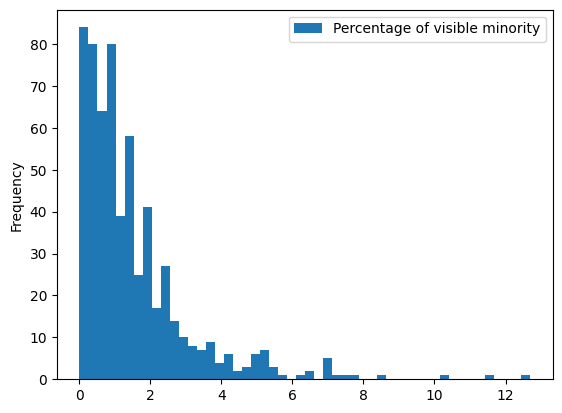

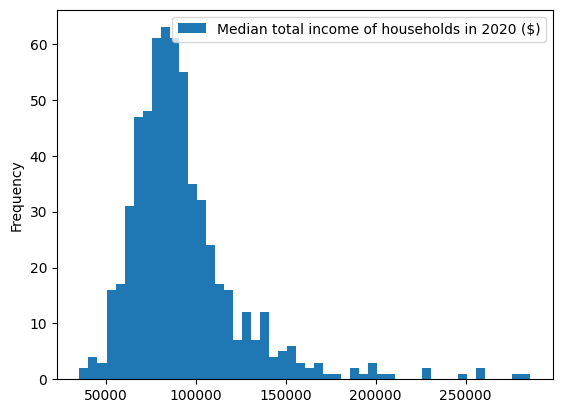

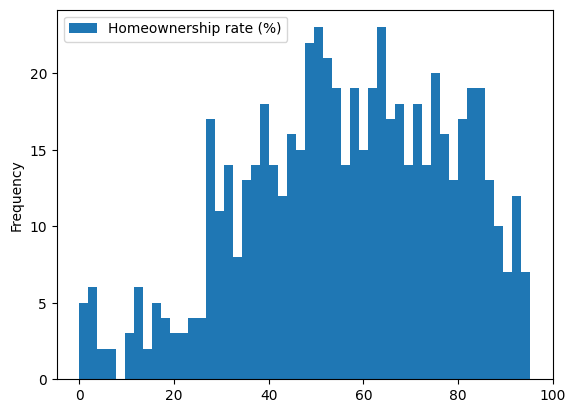

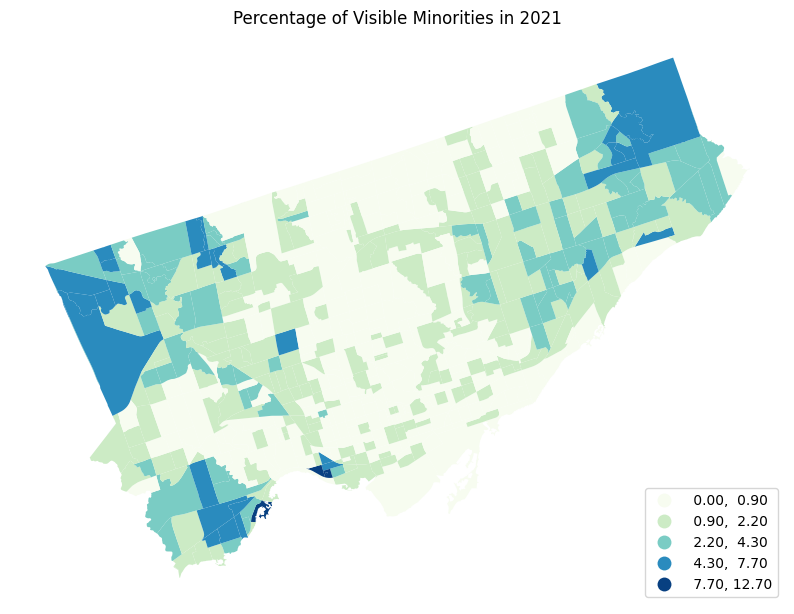

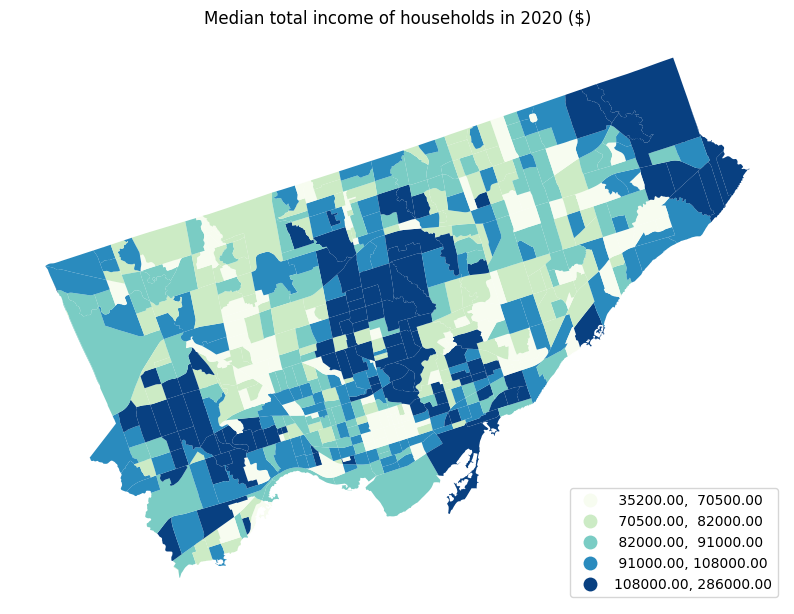

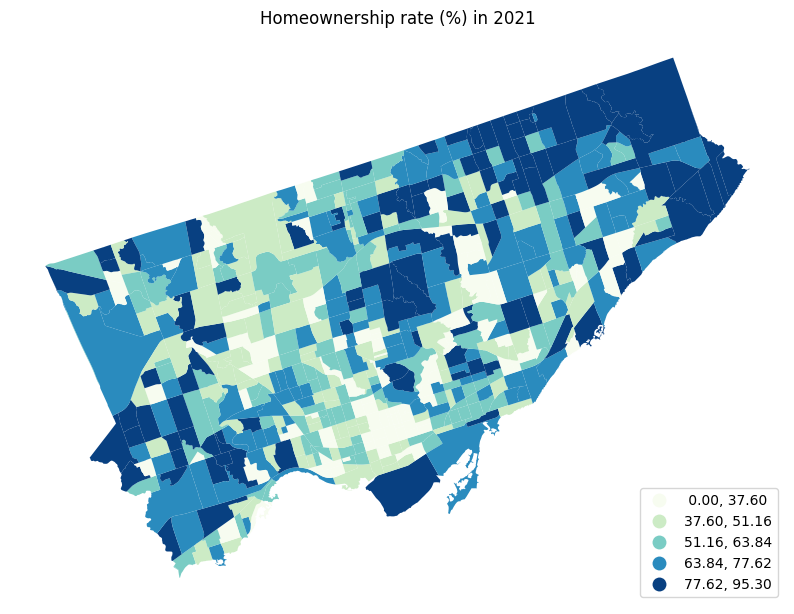

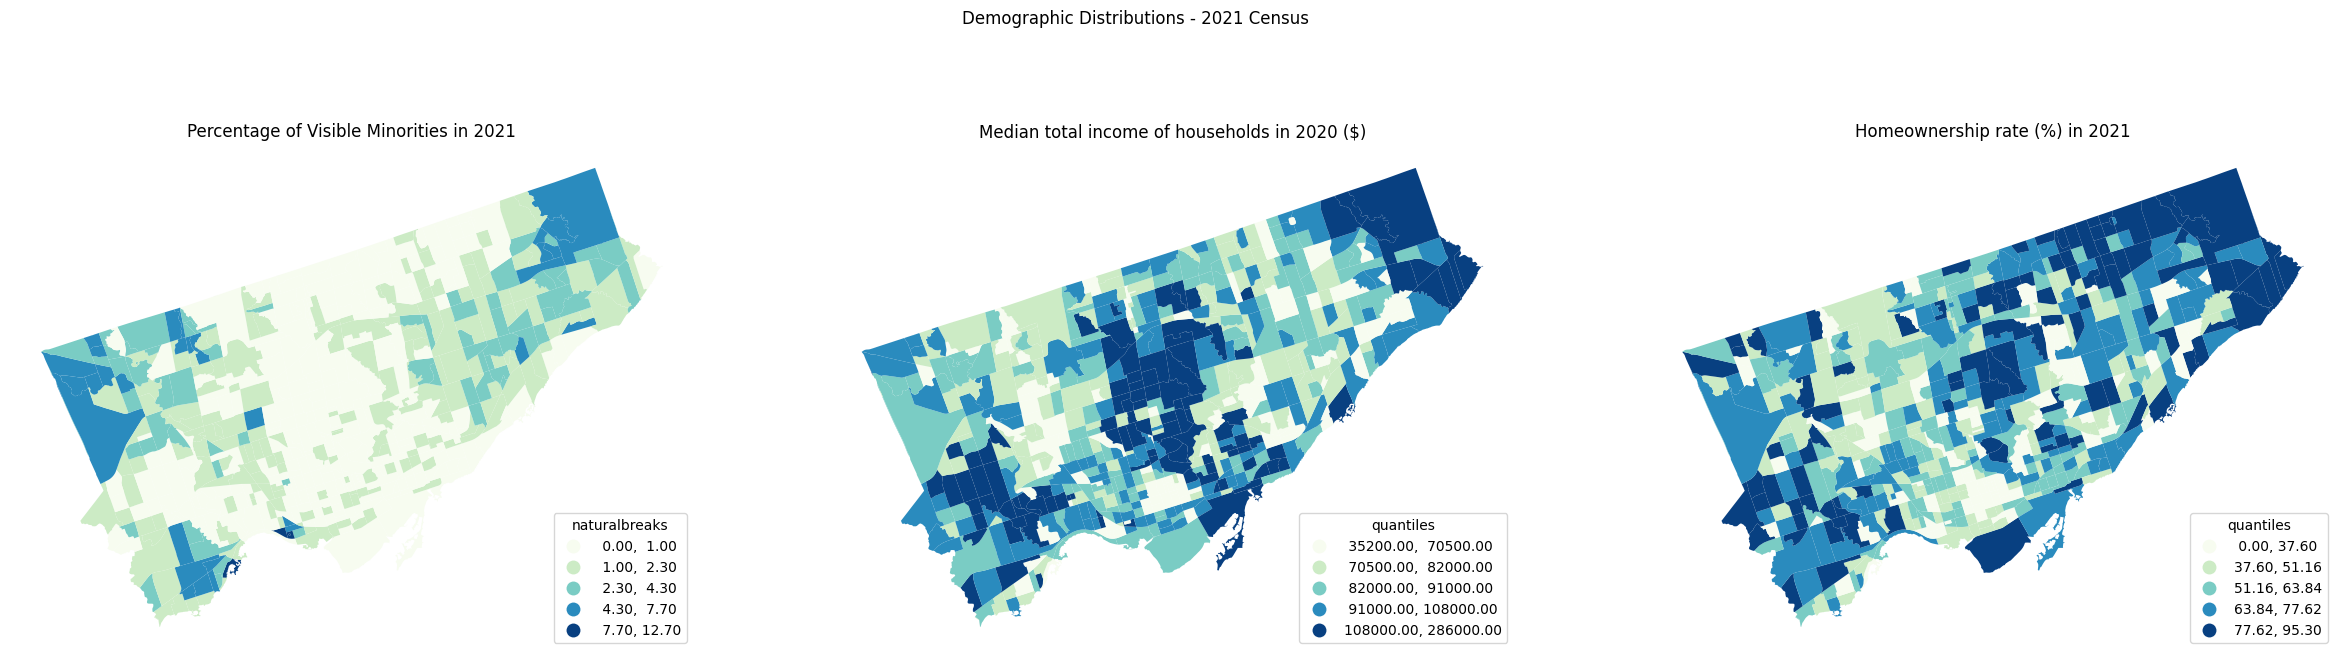

In [8]:
import plotter

print(to_all.columns)

to_all.plot(kind='hist', column = 'Percentage of visible minority', bins = 50)
to_all.plot(kind='hist', column = 'Median total income of households in 2020 ($)', bins = 50)
to_all.plot(kind='hist', column = 'Homeownership rate (%)', bins = 50)

# updated the plotting to use my plotter standard functions

plotter.plot_choropleth(to_all, 'Percentage of Visible Minorities in 2021', column = 'Percentage of visible minority', scheme = 'naturalbreaks')
plotter.plot_choropleth(to_all, 'Median total income of households in 2020 ($)', column = 'Median total income of households in 2020 ($)')
plotter.plot_choropleth(to_all, 'Homeownership rate (%) in 2021', column = 'Homeownership rate (%)')

plotter.plot_choropleths(to_all, suptitle='Demographic Distributions - 2021 Census',
                         titles = ['Percentage of Visible Minorities in 2021','Median total income of households in 2020 ($)', 'Homeownership rate (%) in 2021'],
                         columns = ['Percentage of visible minority', 'Median total income of households in 2020 ($)', 'Homeownership rate (%)'],
                         schemes = ['naturalbreaks', 'quantiles', 'quantiles'])


In [9]:
import pandas as pd

print(pd.isnull(to_all['Median total income of households in 2020 ($)']).sum())
# there are 2 null values for all the variables


0


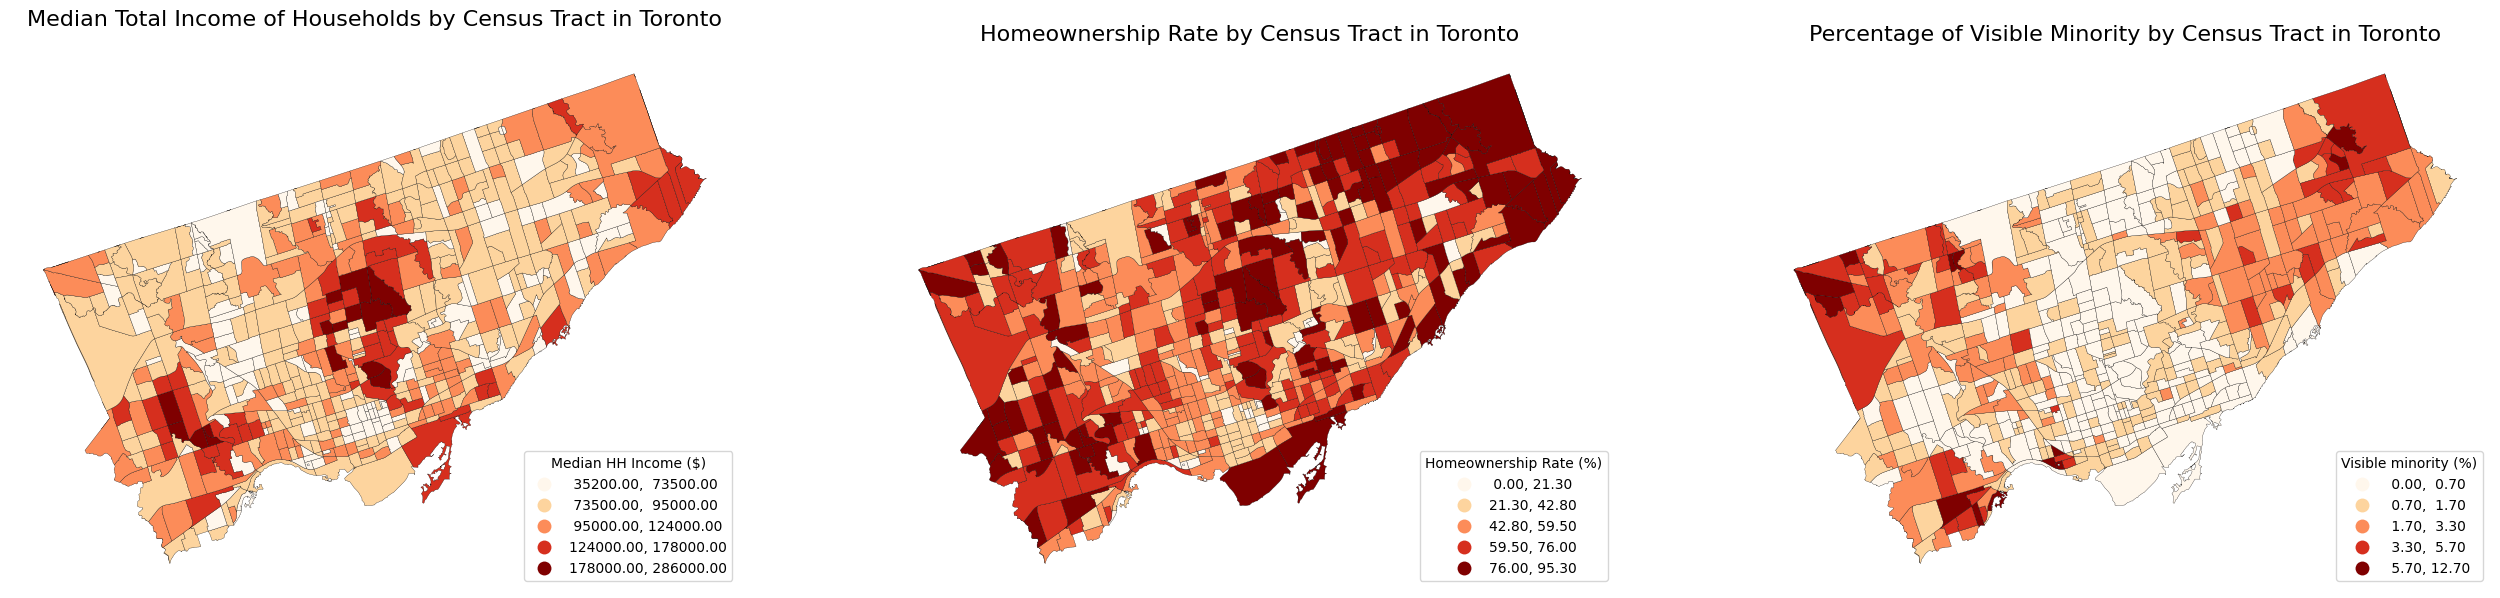

In [10]:
# do we want bivariate maps of the above gdfs ? 
# its a bit of work to set up the colour schemes but its doable
# i don't wanna start this unless we're sure to use them for the report or the presentation
# lmk by tuesday afternoon ig? im working at my intership during the day so I'll probably finish the maps later that night

fig, ax = plt.subplots(1, 3, figsize = (32, 8))

m = mmhh_to.plot(column='Median total income of households in 2020 ($)', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Median HH Income ($)'}, 
            ax=ax[0], edgecolor='black', linewidth=0.2)
m.set_title("Median Total Income of Households by Census Tract in Toronto", fontsize=16)
m.set_axis_off()

m1 = hor_to.plot(column='Homeownership rate (%)', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Homeownership Rate (%)'}, 
            ax=ax[1], edgecolor='black', linewidth=0.2)
m1.set_title("Homeownership Rate by Census Tract in Toronto", fontsize=16)
m1.set_axis_off()

m2 = to_ct.plot(column='Percentage of visible minority', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Visible minority (%)'}, 
            ax=ax[2], edgecolor='black', linewidth=0.2)
m2.set_title("Percentage of Visible Minority by Census Tract in Toronto", fontsize=16)
m2.set_axis_off()

In [11]:
import libpysal as lps

to_ct.to_crs("epsg:3857")
mmhh_to.to_crs("epsg:3857")
hor_to.to_crs("epsg:3857")

,ESRI_OID,Location,Homeownership rate (%),DGUID,geometry
860,NaN,5350500.02 [CT] (Ont.),57.6,2021S05075350500.02,"MULTIPOLYGON (((-8855212.366 5402177.869, -885..."
877,NaN,5350206.01 [CT] (Ont.),56.4,2021S05075350206.01,"POLYGON ((-8853425.505 5401974.906, -8853432.8..."
1024,NaN,5350206.02 [CT] (Ont.),45.2,2021S05075350206.02,"POLYGON ((-8852516.059 5403670.488, -8852479.7..."
1223,NaN,5350205.00 [CT] (Ont.),NaN,2021S05075350205.00,"POLYGON ((-8852009.819 5402311.507, -8852010.8..."
158,NaN,5350509.02 [CT] (Ont.),90.6,2021S05075350509.02,"MULTIPOLYGON (((-8855978.821 5403632.627, -885..."
...,...,...,...,...,...
279,NaN,5350378.25 [CT] (Ont.),87.7,2021S05075350378.25,"POLYGON ((-8820795.82 5440561.024, -8820795.74..."
94,NaN,5350378.22 [CT] (Ont.),92.5,2021S05075350378.22,"POLYGON ((-8825978.653 5438082.272, -8825989.1..."
449,NaN,5350400.14 [CT] (Ont.),82.7,2021S05075350400.14,"POLYGON ((-8822214.271 5440185.491, -8822224.8..."
486,NaN,5350400.23 [CT] (Ont.),81.3,2021S05075350400.23,"POLYGON ((-8822009.234 5440255.772, -8822080.3..."


In [12]:
# Merge `to_ct`, `mmhh_to`, and `hor_to` into a single GeoDataFrame `toronto_ct`
# Try attribute-based merge first (fast), fall back to spatial join if needed.
try:
    toronto_ct = to_ct.merge(mmhh_to, how='left').merge(hor_to, how='left')
    # If geometry got duplicated or renamed, ensure geometry column is preserved from `to_ct`
    if 'geometry_x' in toronto_ct.columns and 'geometry_y' in toronto_ct.columns:
        toronto_ct = gpd.GeoDataFrame(toronto_ct.drop(columns=['geometry_y']).rename(columns={'geometry_x':'geometry'}), geometry='geometry', crs=to_ct.crs)
    else:
        toronto_ct = gpd.GeoDataFrame(toronto_ct, geometry='geometry', crs=to_ct.crs)
    print('Attribute-merge succeeded')
except Exception as e:
    print('Attribute merge failed, using spatial join as fallback:', e)
    toronto_ct = to_ct.copy()
    # join median household income
    toronto_ct = gpd.sjoin(toronto_ct, mmhh_to[['Median total income of households in 2020 ($)']], how='left', predicate='intersects')
    toronto_ct = toronto_ct.drop(columns=['index_right'])
    # join homeownership rate
    toronto_ct = gpd.sjoin(toronto_ct, hor_to[['Homeownership rate (%)']], how='left', predicate='intersects')
    toronto_ct = toronto_ct.drop(columns=['index_right'])
    toronto_ct = gpd.GeoDataFrame(toronto_ct, geometry='geometry', crs=to_ct.crs)

# Quick checks
print('toronto_ct rows:', len(toronto_ct))
try:
    display(toronto_ct.head())
except NameError:
    print(toronto_ct.head())

toronto_ct.iloc[:, [1,3,2,5,6,4]]

Attribute-merge succeeded
toronto_ct rows: 610


,ESRI_OID,Location,Percentage of visible minority,DGUID,geometry,Median total income of households in 2020 ($),Homeownership rate (%)
0,NaN,5350500.02 [CT] (Ont.),1.3,2021S05075350500.02,"MULTIPOLYGON (((617234.911 4827336.029, 617300...",76000.0,57.6
1,NaN,5350206.01 [CT] (Ont.),1.6,2021S05075350206.01,"POLYGON ((618533.284 4827212.139, 618527.942 4...",84000.0,56.4
2,NaN,5350206.02 [CT] (Ont.),2.1,2021S05075350206.02,"POLYGON ((619171.028 4828448.999, 619199.025 4...",81000.0,45.2
3,NaN,5350205.00 [CT] (Ont.),NaN,2021S05075350205.00,"POLYGON ((619555.586 4827473.596, 619554.771 4...",NaN,NaN
4,NaN,5350509.02 [CT] (Ont.),1.2,2021S05075350509.02,"MULTIPOLYGON (((616660.811 4828377.487, 616678...",124000.0,90.6


,Location,DGUID,Percentage of visible minority,Median total income of households in 2020 ($),Homeownership rate (%),geometry
0,5350500.02 [CT] (Ont.),2021S05075350500.02,1.3,76000.0,57.6,"MULTIPOLYGON (((617234.911 4827336.029, 617300..."
1,5350206.01 [CT] (Ont.),2021S05075350206.01,1.6,84000.0,56.4,"POLYGON ((618533.284 4827212.139, 618527.942 4..."
2,5350206.02 [CT] (Ont.),2021S05075350206.02,2.1,81000.0,45.2,"POLYGON ((619171.028 4828448.999, 619199.025 4..."
3,5350205.00 [CT] (Ont.),2021S05075350205.00,NaN,NaN,NaN,"POLYGON ((619555.586 4827473.596, 619554.771 4..."
4,5350509.02 [CT] (Ont.),2021S05075350509.02,1.2,124000.0,90.6,"MULTIPOLYGON (((616660.811 4828377.487, 616678..."
...,...,...,...,...,...,...
605,5350378.25 [CT] (Ont.),2021S05075350378.25,2.3,121000.0,87.7,"POLYGON ((641604.661 4855498.287, 641604.739 4..."
606,5350378.22 [CT] (Ont.),2021S05075350378.22,0.8,93000.0,92.5,"POLYGON ((637898.741 4853635.541, 637890.59 48..."
607,5350400.14 [CT] (Ont.),2021S05075350400.14,1.8,102000.0,82.7,"POLYGON ((640586.006 4855206.288, 640578.437 4..."
608,5350400.23 [CT] (Ont.),2021S05075350400.23,1.4,112000.0,81.3,"POLYGON ((640733.014 4855260, 640682.013 48552..."


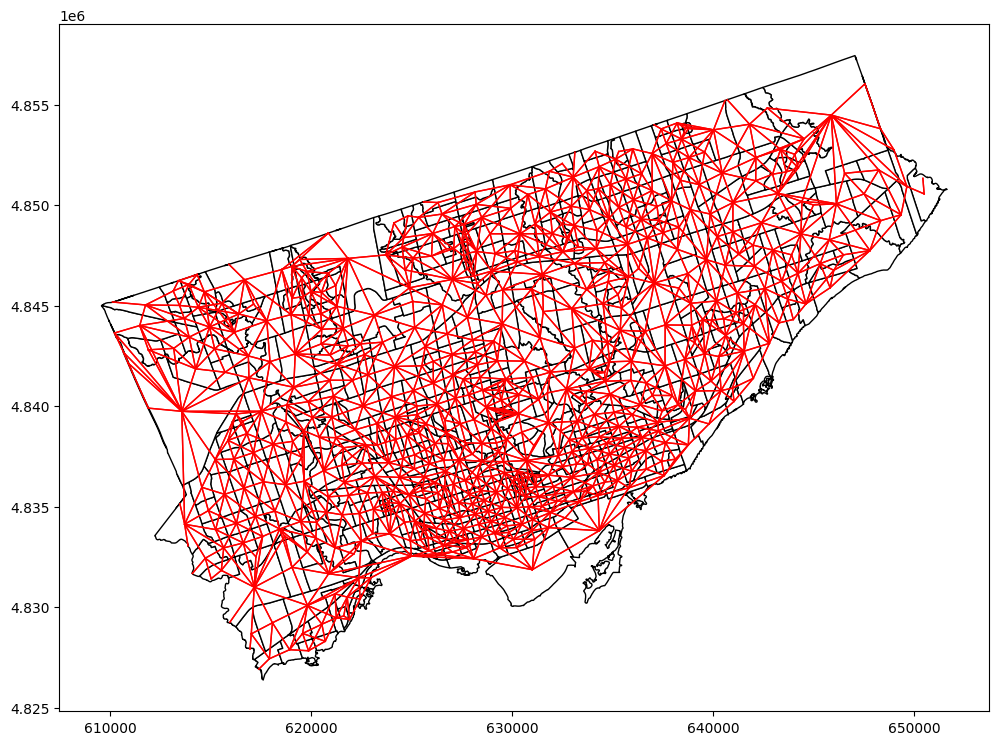

In [ ]:
import esda
import splot
from splot.esda import moran_scatterplot

toronto_ct.to_crs('epsg:3857')

w = lps.weights.Queen.from_dataframe(toronto_ct, use_index=False)


fig, axes = plt.subplots(1, 1, figsize = (12, 12))
toronto_ct.plot(ax = axes, edgecolor = 'black', facecolor = 'w')
w.plot(toronto_ct, ax = axes, edge_kws = dict(color = 'r', linewidth = 1),
       node_kws = dict(marker = ''))

<Axes: >

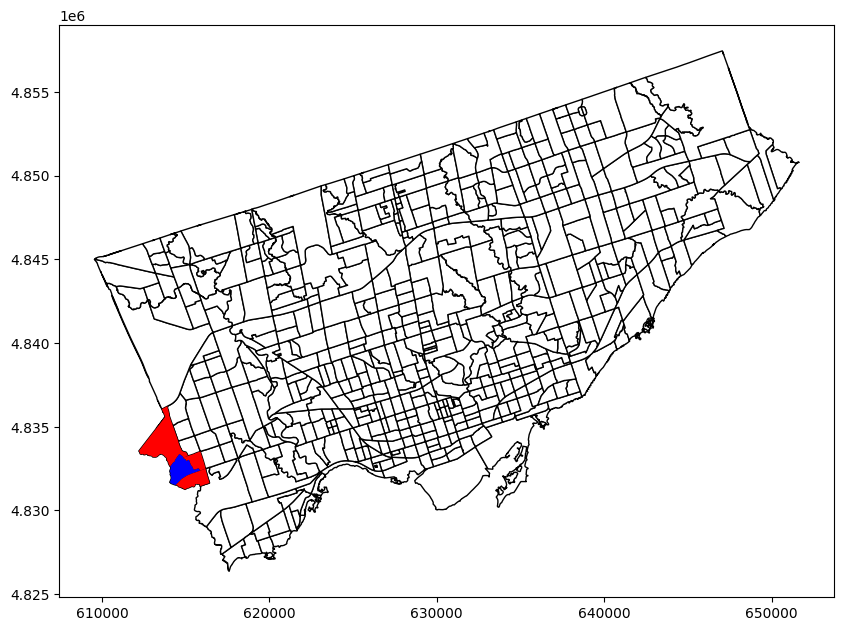

In [14]:
fpt = toronto_ct.loc[[24]]
fn = toronto_ct.loc[[80,20,22,40,27]]

fig, ax = plt.subplots(figsize=(10, 10))
toronto_ct.plot(ax = ax, edgecolor = 'black', facecolor = 'w')
fpt.plot(ax = ax, facecolor = 'b')
fn.plot(ax = ax, facecolor='r')

In [15]:
VMmoransi = esda.Moran(toronto_ct['Percentage of visible minority'], w)
MMHHmoransi = esda.Moran(toronto_ct['Median total income of households in 2020 ($)'], w)
HORmoransi = esda.Moran(toronto_ct['Homeownership rate (%)'],w)

print(f'The Morans I value for VM is {VMmoransi.I}')
print(f'The Morans I value for MMHH is {MMHHmoransi.I}')
print(f'The Morans I value for HOR is {HORmoransi.I}')

print(f'The p-value for VM is {VMmoransi.p_sim}')
print(f'The p-value for MMHH is {MMHHmoransi.p_sim}')
print(f'The p-value for HOR is {HORmoransi.p_sim}')

The Morans I value for VM is nan
The Morans I value for MMHH is nan
The Morans I value for HOR is nan
The p-value for VM is 0.001
The p-value for MMHH is 0.001
The p-value for HOR is 0.001


In [16]:
print(VMmoransi.I)
w = lps.weights.Queen.from_dataframe(toronto_ct, use_index=False, ids='DGUID')
VMmoransi = esda.Moran(toronto_ct['Percentage of visible minority'], w)
print(VMmoransi.I)

print(toronto_ct['Percentage of visible minority'].values)

nan
nan
[ 1.3  1.6  2.1  nan  1.2  2.4  1.5  2.3  6.2  4.4  1.4  4.2  8.6  2.8
  5.3  1.1  1.3  5.5  1.7  7.3  0.6  2.3  0.   5.   1.   1.8  3.5  2.4
  0.5  2.6  2.8  1.8  0.5  0.5  0.   0.8  0.   0.   1.2  0.3  2.6  1.1
  1.   1.2  1.7  0.5  0.9  0.   0.   0.   0.9  0.4  0.   0.8  0.9  0.4
  0.7  1.8  2.3  1.4  1.   0.   2.1  0.3  0.6  0.3  1.   1.2  0.5  1.7
  2.9  0.5  2.3  0.   1.   1.2  1.3  2.5  2.3  2.1  1.2  0.7  3.   4.9
  5.2  1.8  0.   1.1  0.7  2.6  0.7  2.5  1.   2.4  2.   1.2  2.5  1.8
  1.3  2.2  1.8  1.   0.3  0.   0.6  1.8  2.6  1.4  1.6  1.2  1.6  2.7
  2.6  1.4  3.5  5.   7.   5.4  6.9  5.1  7.7  2.9  3.9  3.9  5.   1.8
  1.   0.9  0.7  0.6  1.6  1.9  1.9  5.7  3.6  4.2  2.5  3.7  1.   2.3
  2.2  1.8  3.6  3.8  5.3  6.5  7.   2.6  4.3  2.4  4.8  5.3  3.1  1.7
  0.8  7.5  3.4  0.7  1.6  0.   2.2  2.1  2.4  0.6  1.8  0.   0.6  1.3
  1.5  1.   0.7  1.2  0.9  0.   0.4  1.1  4.1  1.3  1.1  4.9  1.5  1.
  0.   1.   0.8  0.  10.3  nan 12.7  0.   0.9  1.3  7.1  0.   0.5  0.7

In [17]:
import pandas as pd

print(pd.isnull(toronto_ct['Percentage of visible minority']).sum())
toronto_ct_clone = toronto_ct
#print(toronto_ct_clone['Percentage of visible minority'].values)

#toronto_ct_clone['Percentage of visible minority'] = toronto_ct_clone['Percentage of visible minority'].fillna(toronto_ct_clone['Percentage of visible minority'].mean())
#print(toronto_ct_clone['Percentage of visible minority'].values)
#print(toronto_ct_clone['Percentage of visible minority'].values)
# w = lps.weights.Queen.from_dataframe(toronto_ct, use_index=False, ids='DGUID')
# VMmoransi = esda.Moran(toronto_ct_clone['Percentage of visible minority'], w)
# print(VMmoransi.I)

# toronto_ct_clone['Median total income of households in 2020 ($)'] = toronto_ct_clone['Median total income of households in 2020 ($)'].fillna(toronto_ct_clone['Median total income of households in 2020 ($)'].mean())
# toronto_ct_clone['Homeownership rate (%)'] = toronto_ct_clone['Homeownership rate (%)'].fillna(toronto_ct_clone['Homeownership rate (%)'].mean())

#print(toronto_ct_clone['Percentage of visible minority'].values)
# MMHHmoransi = esda.Moran(toronto_ct_clone['Median total income of households in 2020 ($)'], w)
# HORmoransi = esda.Moran(toronto_ct_clone['Homeownership rate (%)'],w)

# print(f'The Morans I value for VM is {VMmoransi.I}')
# print(f'The Morans I value for MMHH is {MMHHmoransi.I}')
# print(f'The Morans I value for HOR is {HORmoransi.I}')

# print(f'The p-value for VM is {VMmoransi.p_sim}')
# print(f'The p-value for MMHH is {MMHHmoransi.p_sim}')
# print(f'The p-value for HOR is {HORmoransi.p_sim}')

2


In [18]:
MMHHmorans_local = esda.Moran_Local(toronto_ct_clone['Median total income of households in 2020 ($)'], w)

<Axes: >

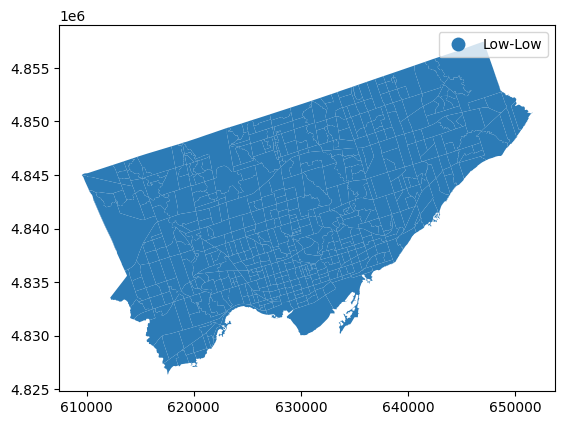

In [19]:
MMHHmorans_local.plot(toronto_ct_clone, legend = True)

<Axes: >

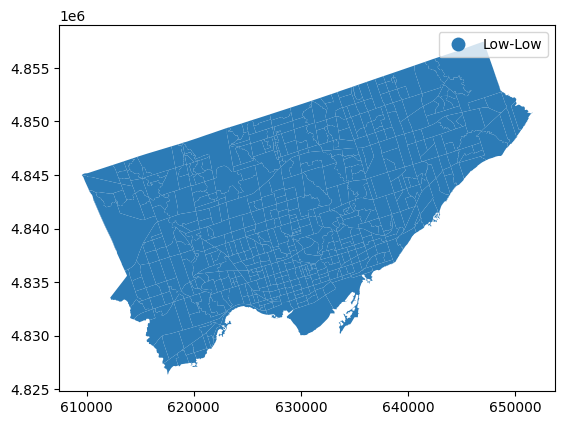

In [20]:
HORmorans_local = esda.Moran_Local(toronto_ct_clone['Homeownership rate (%)'], w)
HORmorans_local.plot(toronto_ct_clone, legend = True)

<Axes: >

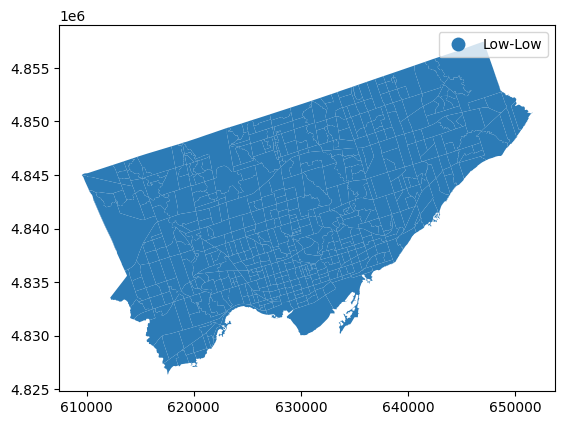

In [21]:
VMmorans_local = esda.Moran_Local(toronto_ct_clone['Percentage of visible minority'], w)
VMmorans_local.plot(toronto_ct_clone, legend = True)

In [22]:
iso_file = gpd.read_file('./isochrones_final/isochrones_change_final.shp')


In [23]:
#pd.isnull(iso_file['30_change']).sum()
toronto_ct_clone['Percentage of visible minority'] = toronto_ct_clone['Percentage of visible minority'].fillna(toronto_ct_clone['Percentage of visible minority'].mean())


In [29]:
w2 = lps.weights.Queen.from_dataframe(iso_file, use_index=False, ids='DGUID')
#(if permutations>0) values indicate quandrant location 1 HH, 2 LH, 3 LL, 4 HL
ISO_30_change_morans_local = esda.Moran_Local(iso_file['30_change'], w2)

to_all['30_change_moran'] = ISO_30_change_morans_local.q

# ISO_30_change_morans_local.plot(iso_file, legend = True)

# ISO_30_2015_morans_local = esda.Moran_Local(iso_file['30_2015'], w2)
# ISO_30_2015_morans_local.plot(iso_file, legend = True)

# ISO_30_2025_morans_local = esda.Moran_Local(iso_file['30_2025'], w2)
# ISO_30_2025_morans_local.plot(iso_file, legend = True)


ValueError: Length of values (585) does not match length of index (610)

In [25]:
iso_df = iso_file[['DGUID', '30_change','30_increas', '30_2025', '30_2015']]
toronto_all = toronto_ct_clone.merge(iso_df, how = 'right', on = 'DGUID')

In [26]:
w3 = lps.weights.Queen.from_dataframe(toronto_all, use_index=False, ids='DGUID')

<Axes: >

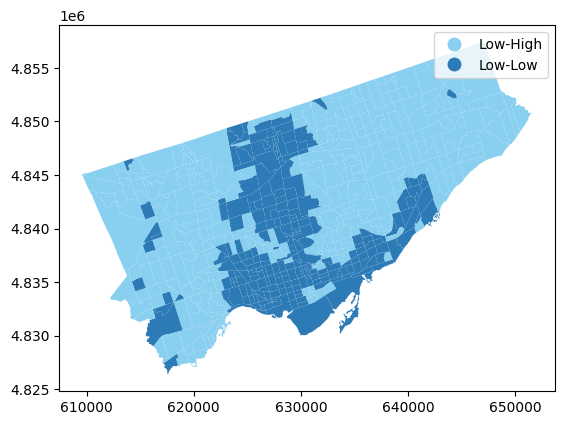

In [27]:
MMHH_30_change_BV = esda.Moran_Local_BV(toronto_all['Median total income of households in 2020 ($)'], toronto_all['30_change'], w3)
MMHH_30_change_BV.plot(toronto_all, legend = True)

<Axes: >

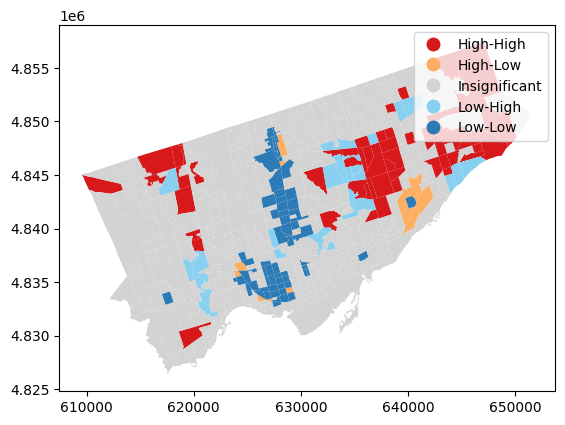

In [28]:
VM_30_change_BV = esda.Moran_Local_BV(toronto_all['Percentage of visible minority'], toronto_all['30_change'], w3)
VM_30_change_BV.plot(toronto_all, legend = True)